In [1]:
# Preenchimento da disposição do Jupyter Notebook, em Tela Cheia
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Importação das Bibliotecas de Python necessárias

# Importação da Biblioteca NumPy para Python, com o pseudónimo "num_py"
import numpy as num_py

# Importação do módulo PyPlot da Biblioteca Matplotlib para Python, com o pseudónimo "py_plot"
from matplotlib import pyplot as py_plot

# Importação dos módulos display, clear_output
from IPython.display import display, clear_output

In [3]:
# Uso de Fundo Negro, como padrão para os gráficos construídos,
# a partir do módulo PyPlot
py_plot.style.use("dark_background")

In [4]:
# Definição do intervalo das coordenadas x e y, mínimas e máximas,
# dos gráficos gerados, para o Experimento da Dupla-Fenda
x_min, x_max = 0, 10
y_min, y_max = -5, 5

In [5]:
# Definição de números de pontos (x,y) a serem gerados,
# para a propagação das ondas de luz, provenientes das fendas
num_pontos_xs, num_pontos_ys = 200, 200

In [6]:
# Geração dos pontos x e y,
# calculados no intervalo definido anteriormente,
# para o número de pontos (x,y) a serem gerados,
# para a propagação das ondas de luz, provenientes das fendas
xs = num_py.linspace(x_min, x_max, num_pontos_xs)
ys = num_py.linspace(y_min, y_max, num_pontos_ys)

In [7]:
# Criação das matrizes de coordenadas para os pontos (x,y),
# geradas anteriormente
xs_matriz_coordenadas, ys_matriz_coordenadas = num_py.meshgrid(xs, ys, sparse = False)

In [8]:
# Geração de pontos onde espectro da luz é vísivel
pontos_espectro_luz = num_py.concatenate([xs_matriz_coordenadas.reshape(-1, 1), ys_matriz_coordenadas.reshape(-1, 1)], axis=-1)

In [9]:
# Definição das coordenadas (x,y) para as 2 fendas de fontes de luz
fenda_fonte_luz_1 = num_py.array([0, 0.5])
fenda_fonte_luz_2 = num_py.array([0, -0.5])

In [10]:
# Cálculo dos pontos para o trajeto para onde a luz é propagada,
# em relação às 2 fendas de fontes de luz 
pontos_propagacao_fenda_fonte_luz_1 = (pontos_espectro_luz - fenda_fonte_luz_1)
pontos_propagacao_fenda_fonte_luz_2 = (pontos_espectro_luz - fenda_fonte_luz_2)

In [11]:
# Definição das amplitudes das 2 ondas de luz
amplitude_onda_luz_1 = 4
amplitude_onda_luz_2 = 4

In [12]:
# Definição do factor constante,
# para os pontos da propagação das 2 ondas de luz
factor_constante_onda = 20

In [13]:
# Cálculo das 2 ondas de luz, provenientes das fendas
ondas_luz_1 = amplitude_onda_luz_1*(num_py.sin( factor_constante_onda * (pontos_propagacao_fenda_fonte_luz_1[:, 0]**2 + pontos_propagacao_fenda_fonte_luz_1[:, 1]**2)**0.5))
ondas_luz_2 = amplitude_onda_luz_2*(num_py.sin( factor_constante_onda * (pontos_propagacao_fenda_fonte_luz_2[:, 0]**2 + pontos_propagacao_fenda_fonte_luz_2[:, 1]**2)**0.5))

In [14]:
# Cálculo da sobreposição das 2 ondas de luz, provenientes das 2 fendas
# (sendo elas, sobreposições construtivas ou destrutivas)
sobreposicao_ondas_luz = (ondas_luz_1 + ondas_luz_2)

In [15]:
# Cálculo da intensidade da sobreposição das ondas de luz,
# provenientes das 2 fendas
intensidade_sobreposicao_ondas_luz = (sobreposicao_ondas_luz**2)

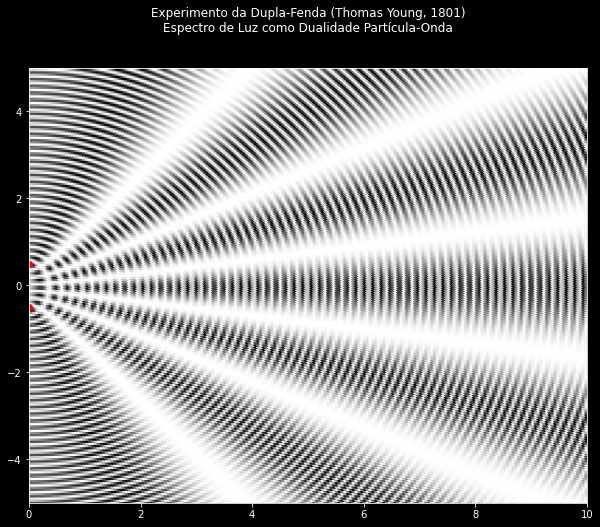

In [16]:
# Gráfico do Experimento da Dupla-Fenda (Thomas Young, 1801) - Espectro de Luz

# Definição da moldura/figura para o gráfico do Experimento da Dupla-Fenda,
# de acordo com o intervalo de pontos (x, y), mínimos e máximos
py_plot.figure(figsize=(10, 8))
py_plot.xlim(x_min, x_max)
py_plot.ylim(y_min, y_max)

# Definição do Título do gráfico do Experimento da Dupla-Fenda
py_plot.title("Experimento da Dupla-Fenda (Thomas Young, 1801)\nEspectro de Luz como Dualidade Partícula-Onda\n\n")

# Marcação dos pontos relativos à disseminação do espectro de luz,
# proveniente das 2 fendas de luz
py_plot.scatter(pontos_espectro_luz[:, 0], pontos_espectro_luz[:, 1], c = intensidade_sobreposicao_ondas_luz, cmap=py_plot.cm.binary)

# Marcação dos pontos relativos às coordenadas das 2 fendas de luz
py_plot.scatter(*fenda_fonte_luz_1, c="red")
py_plot.scatter(*fenda_fonte_luz_2, c="red")

In [17]:
# Definição do intervalo e velocidade com que a propagação das ondas de luz,
# provenientes das 2 fendas, são animadas
intervalo_animacao_propagacao_ondas_luz = 0.5
velocidade_animacao_propagacao_ondas_luz = 0.02

In [18]:
# Raios dos arcos da propagação das ondas de luz,
# provenientes das 2 fendas
raios_arcos_propagacao_ondas_luz = num_py.linspace(x_min, x_max, int((x_max - x_min) / intervalo_animacao_propagacao_ondas_luz))

In [19]:
# Definição do número de passos para o ciclo, responsável por gerar
# a animação do Experimento da Fenda-Dupla
num_passos_ciclo_animacao = 100

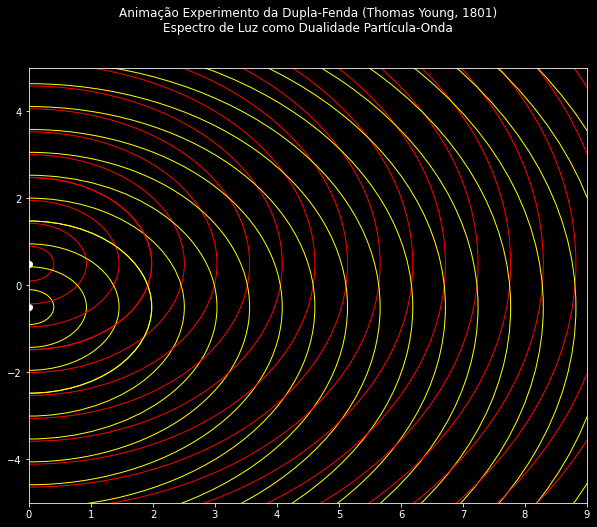

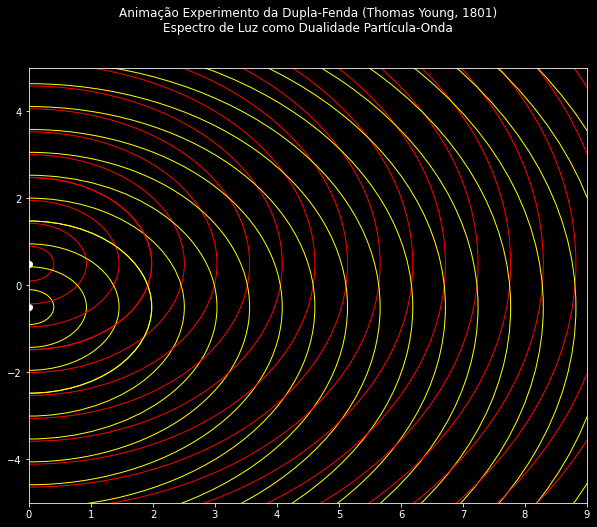

In [20]:
# Gráfico do Experimento da Dupla-Fenda (Thomas Young, 1801) - Espectro de Luz (Animado)

# Criação da Figura e Eixos para o Gráfico do Experimento da Dupla-Fenda Animado
figura, eixo = py_plot.subplots(figsize=(10, 8))

# Definição do limite mínimo e máximo para a marcação de pontos
# no Gráfico do Experimento da Dupla-Fenda Animado
py_plot.xlim(x_min, (x_max - 1))
py_plot.ylim(y_min, y_max)

# Lista de círculos da propagação das ondas de luz,
# provenientes das 2 fendas 
circulos_propagacao_ondas_luz_1, circulos_propagacao_ondas_luz_2 = [], []

# Para cada raio do arco da propagação das ondas de luz,
# provenientes das 2 fendas
for raio_arco_propagacao_ondas_luz in raios_arcos_propagacao_ondas_luz:
    
    # Cálculo do círculos da propagação das ondas de luz,
    # provenientes da primeira fenda
    circulo_propagacao_ondas_luz_1 = py_plot.Circle(fenda_fonte_luz_1, raio_arco_propagacao_ondas_luz, facecolor=(1, 0, 0, 0), edgecolor="red")
    circulos_propagacao_ondas_luz_1.append(eixo.add_artist(circulo_propagacao_ondas_luz_1))

    # Cálculo do círculos da propagação das ondas de luz,
    # provenientes da segunda fenda
    circulo_propagacao_ondas_luz_2 = py_plot.Circle(fenda_fonte_luz_2, raio_arco_propagacao_ondas_luz, facecolor=(1, 0, 0, 0), edgecolor="yellow")
    circulos_propagacao_ondas_luz_2.append(eixo.add_artist(circulo_propagacao_ondas_luz_2))

# Definição do Título do gráfico da Animação do Experimento da Dupla-Fenda
py_plot.title("Animação Experimento da Dupla-Fenda (Thomas Young, 1801)\nEspectro de Luz como Dualidade Partícula-Onda\n\n")
    
# Marcação dos pontos relativos às coordenadas das 2 fendas de luz
py_plot.scatter(*fenda_fonte_luz_1, c="white")
py_plot.scatter(*fenda_fonte_luz_2, c="white")

# Para cada passo do ciclo, responsável por gerar a animação do Experimento da Fenda-Dupla
for num_passo_atual_ciclo_animacao in range(num_passos_ciclo_animacao):
    
    # Definição dos raios dos círculos dos arcos da propagação das ondas de luz,
    # provenientes das 2 fendas
    [circulo_propagacao_ondas_luz_1.set_radius(raios_arcos_propagacao_ondas_luz[circulo_propagacao_ondas_luz_1_indice]) for circulo_propagacao_ondas_luz_1_indice, circulo_propagacao_ondas_luz_1 in enumerate(circulos_propagacao_ondas_luz_1)]
    [circulo_propagacao_ondas_luz_2.set_radius(raios_arcos_propagacao_ondas_luz[circulo_propagacao_ondas_luz_2_indice]) for circulo_propagacao_ondas_luz_2_indice, circulo_propagacao_ondas_luz_2 in enumerate(circulos_propagacao_ondas_luz_2)]
    
    # Atualização dos raios dos arcos da propagação das ondas de luz,
    # provenientes das 2 fendas
    raios_arcos_propagacao_ondas_luz = ( (raios_arcos_propagacao_ondas_luz + velocidade_animacao_propagacao_ondas_luz) % (x_max - x_min) )
    
    # Limpa a Figura para a animação no passo atual,
    # com um compasse de espera, antes remover o conteúdo do passo anterior
    clear_output(wait=True)
    
    # Mostra a figura, no passo actual
    display(figura)

***

**Uma atualização em:** 27 de Junho, 2021

**Autor:** _Rúben André Barreiro_

**Adaptado da Dissertação/Tese de Mestrado:**
* "_Acordo de Chave de Conferência Semi-Quântico (ACCSQ)_" - 2021

**© Direitos de autoria Qiskrypt, 2021, todos os direitos reservados.**

***

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />Este trabalho está licenciado sobre uma <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Licensa Internacional da Creative Commons Attribution-NonCommercial-NoDerivatives 4.0</a>.